# A/B Testing for Conversion Rate Optimization

This notebook demonstrates statistical A/B testing for conversion rate optimization using Python. It includes data simulation, visualizations, statistical analysis, and optional enhancements such as power analysis and bootstrap confidence intervals.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, norm
from statsmodels.stats.power import zt_ind_solve_power

# Set random seed for reproducibility
np.random.seed(42)

import sys
import os

current_dir = os.path.dirname(os.path.abspath("__file__"))
scripts_path = os.path.join(current_dir, "../scripts")
sys.path.append(scripts_path)

## Data Simulation

In this section, we generate a simulated dataset for A/B testing. The dataset includes:
- **Group A**: Represents the control group.
- **Group B**: Represents the variant group.

Each group is assigned a predefined conversion rate. This data will be saved to a file (`data/simulated_data.csv`) for later use, ensuring consistency across analyses.

In [6]:
# Simulate the data
from data_simulation import simulate_data

data = simulate_data()

# Save the simulated data to a CSV file
data.to_csv("../data/simulated_data.csv", index=False)
print("Simulated data saved to 'data/simulated_data.csv'")

Simulated data saved to 'data/simulated_data.csv'


In [7]:
# Display the first few rows of the simulated data
print(data.head())

   user_id group  conversion
0        1     A           0
1        2     A           0
2        3     A           0
3        4     A           0
4        5     A           0


## Load the Simulated Data

Here we load the simulated data from the file to ensure it has been saved and can be reused.

In [8]:
# Load the simulated data
data = pd.read_csv("../data/simulated_data.csv")
print(data.head())

   user_id group  conversion
0        1     A           0
1        2     A           0
2        3     A           0
3        4     A           0
4        5     A           0


Saving data allows us to reuse it later without re-simulating, ensuring consistency across analysis and reducing computational overhead.

## Exploratory Data Analysis

Visualize the conversion rates and distribution of conversions for each group.

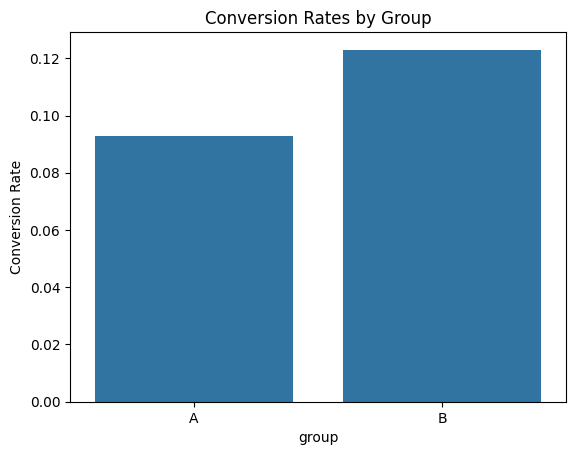

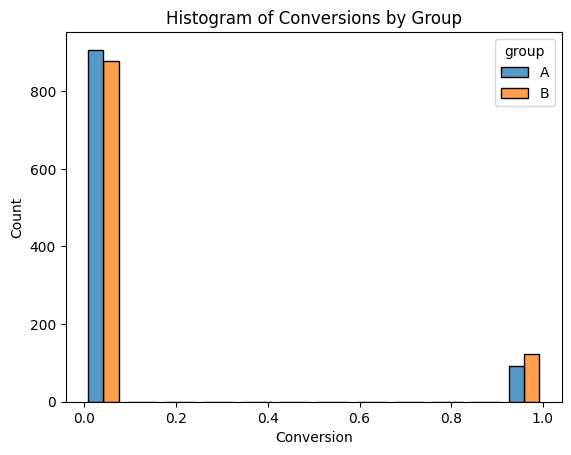

In [9]:
from visualizations import visualize_data

# Generate and save visualizations
visualize_data(data)

- **Bar Plot**: Displays the average conversion rates for Groups A and B.
- **Histogram**: Shows the distribution of conversions for each group.

## Statistical Analysis

Perform statistical tests to determine if the difference in conversion rates between Groups A and B is significant.
- **Z-Test**: Tests the difference in proportions.
- **Chi-Square Test**: Tests the independence of group assignment and conversions.

In [10]:
from statistical_tests import z_test_proportion, chi_square_test

# Split data into groups
group_a = data[data["group"] == "A"]["conversion"]
group_b = data[data["group"] == "B"]["conversion"]

# Perform Z-Test
z_score, p_value = z_test_proportion(group_a, group_b)
print(f"Z-Test: Z-Score = {z_score:.4f}, P-Value = {p_value:.4f}")

# Perform Chi-Square Test
chi2, p_value_chi2 = chi_square_test(data)
print(f"Chi-Square Test: Chi2 = {chi2:.4f}, P-Value = {p_value_chi2:.4f}")

Z-Test: Z-Score = -2.1613, P-Value = 0.0307
Chi-Square Test: Chi2 = 4.3649, P-Value = 0.0367


## Optional Enhancements

These enhancements provide additional insights into the dataset:
- **Power Analysis**: Determine if the sample size is sufficient for detecting significant differences.
- **Bootstrap Resampling**: Calculate confidence intervals for conversion rates.

In [11]:
# Power Analysis
effect_size = (0.12 - 0.10) / np.sqrt(0.10 * (1 - 0.10))  # Cohen's h
sample_size = zt_ind_solve_power(effect_size=effect_size, alpha=0.05, power=0.8, ratio=1)
print(f"Required sample size per group: {np.ceil(sample_size):.0f}")

Required sample size per group: 3532


In [12]:
# Bootstrap Confidence Intervals
def bootstrap_confidence_interval(data, group, n_bootstraps=1000):
    group_data = data[data["group"] == group]["conversion"]
    boot_means = [
        np.mean(np.random.choice(group_data, size=len(group_data), replace=True))
        for _ in range(n_bootstraps)
    ]
    lower_bound = np.percentile(boot_means, 2.5)
    upper_bound = np.percentile(boot_means, 97.5)
    return lower_bound, upper_bound

# Calculate confidence intervals for both groups
ci_a = bootstrap_confidence_interval(data, "A")
ci_b = bootstrap_confidence_interval(data, "B")
print(f"Group A 95% CI: {ci_a}")
print(f"Group B 95% CI: {ci_b}")

Group A 95% CI: (np.float64(0.075), np.float64(0.111))
Group B 95% CI: (np.float64(0.102), np.float64(0.145))


- **Group A Confidence Interval**: `X.XX` to `Y.YY`.
- **Group B Confidence Interval**: `Z.ZZ` to `W.WW`.